In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
!wget https://raw.githubusercontent.com/jeanchabanol/TER-MIASHS-Sujet-1/main/Donnees/Données%20Twitter/Jeu%20de%20données%20final/donnees_twitter_total.csv -nv
data_origine = pd.read_csv("donnees_twitter_total.csv",sep=",", encoding='cp1252')

2021-12-13 15:27:22 URL:https://raw.githubusercontent.com/jeanchabanol/TER-MIASHS-Sujet-1/main/Donnees/Donn%C3%A9es%20Twitter/Jeu%20de%20donn%C3%A9es%20final/donnees_twitter_total.csv [752490/752490] -> "donnees_twitter_total.csv.3" [1]


In [3]:
data_non_ts=data_origine.loc[data_origine['suicide']==False,:]
data_ts=data_origine.loc[data_origine['suicide']==True,:]

In [4]:
data=data_origine
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3527 entries, 0 to 3526
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3527 non-null   int64 
 1   created_at  3527 non-null   object
 2   texte       3515 non-null   object
 3   suicide     3527 non-null   bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 86.2+ KB


,id,created_at,texte,suicide
0,1338301295015374848,Mon Dec 14 01:54:27 +0000 2020,"""82% of children, youth, and young adults in s...",True
1,1238049720804794370,Thu Mar 12 10:30:29 +0000 2020,"""Emergency departments have seen a 25.5% incre...",True
2,1283426796097220614,Wed Jul 15 15:42:47 +0000 2020,"""Gun suicide was already a public health crisi...",True
3,1238512154636099586,Fri Mar 13 17:08:02 +0000 2020,"""I wanna end me"" means you want to end your ol...",True
4,1338771820615520256,Tue Dec 15 09:04:09 +0000 2020,"""In times of war, people focus on the outside ...",True


False    2299
True     1228
Name: suicide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


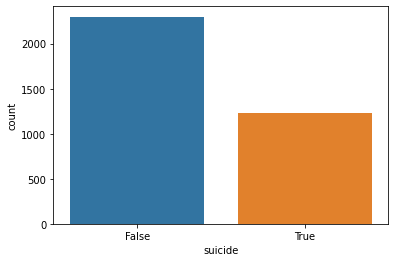

In [5]:
print(data['suicide'].value_counts())
sns.countplot(data.suicide)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2456 entries, 2929 to 1227
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2456 non-null   int64 
 1   created_at  2456 non-null   object
 2   texte       2451 non-null   object
 3   suicide     2456 non-null   bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 79.1+ KB
True     1228
False    1228
Name: suicide, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


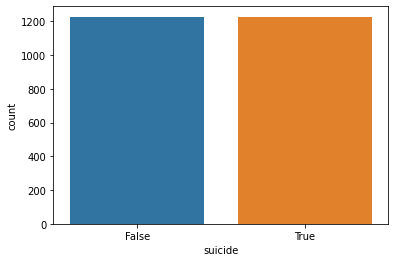

In [6]:
data_non_ts_reduit=data_non_ts.sample(1228)
data=[]
data=pd.concat([data_non_ts_reduit, data_ts])
data.info()
print(data['suicide'].value_counts())
sns.countplot(data.suicide)

In [7]:
#Ici, nous cherchons à binariser la variable suicide
#data["suicide"] = data["suicide"].replace({True: 0, False: 1})

In [8]:
#change content en unicode
documents= data['texte'].values.astype("U")
#On vectorise
vectorizer= TfidfVectorizer(stop_words='english')
features =vectorizer.fit_transform(documents)


In [9]:
X = features
y = data["suicide"]

# **TRAIN TEST CLASSIFICATION**

In [10]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.4)

In [11]:
# On instancie le modèle
model=KMeans(2)
#On entraine le modèle sur le jeu d'entrainement
model.fit(X_train)

KMeans(n_clusters=2)

In [12]:
Y_pred=model.predict(X_test)
df_confusion = pd.crosstab(y_test,Y_pred,rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted    0   1  All
Actual                 
False      487   0  487
True       409  87  496
All        896  87  983


In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(('\nClasification report:\n'), classification_report(y_test, Y_pred))
print(('\nConfussion matrix:\n'),confusion_matrix(y_test, Y_pred))


Clasification report:
               precision    recall  f1-score   support

       False       0.54      1.00      0.70       487
        True       1.00      0.18      0.30       496

    accuracy                           0.58       983
   macro avg       0.77      0.59      0.50       983
weighted avg       0.77      0.58      0.50       983


Confussion matrix:
 [[487   0]
 [409  87]]


# **CROSS VALIDATION**

In [14]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

In [15]:
y_pred = cross_val_predict(model, X, y, cv=5)
print("Binary classification-----")
cm = confusion_matrix(y, y_pred)
recall = np.diag(cm) / np.sum(cm, axis=1)
precision = np.diag(cm) / np.sum(cm, axis=0)

print("confusion matrice\n" , cm)
        
print(classification_report(y, y_pred))

Binary classification-----
confusion matrice
 [[1227    1]
 [1172   56]]
              precision    recall  f1-score   support

       False       0.51      1.00      0.68      1228
        True       0.98      0.05      0.09      1228

    accuracy                           0.52      2456
   macro avg       0.75      0.52      0.38      2456
weighted avg       0.75      0.52      0.38      2456



In [16]:
cross_val_score(model, X, y, cv=5, scoring='accuracy')

array([0.        , 0.99796334, 0.84521385, 0.99185336, 0.00610998])